# Data augmentation with SMOTE ENN

In [ ]:
import pandas as pd

df = pd.read_csv("32features_1hour_shift_222222222.csv")


In [ ]:
print("Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())


Nombre de valeurs manquantes par colonne :
cow                0
start_time         0
end_time           0
duration_hours     0
Minimum            0
Maximum            0
Mean               0
RMS                0
STD                0
MeanSTD6h         60
STDMean6h         60
STDSD              0
RMSSD              0
Mode               0
Q10                0
Q90                0
Q25                0
Q50                0
Q75                0
Skewness           0
Kurtosis           0
Autocorr1          0
Autocorr2          0
Autocorr3          0
Autocorr4          0
Autocorr5          0
Autocorr6          0
Autocorr7          0
Autocorr8          0
Autocorr9          0
Autocorr10         0
Autocorr11         0
h1                 0
h2                 0
h3                 0
h4                 0
oestrus            0
calving            0
lameness           0
mastitis           0
other_disease      0
OK                 0
dtype: int64


In [ ]:
print("Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())

# Afficher nombre de lignes et de colonnes
print(f"✅ Nombre de lignes : {df.shape[0]}")
print(f"✅ Nombre de colonnes : {df.shape[1]}")


Nombre de valeurs manquantes par colonne :
cow                0
start_time         0
end_time           0
duration_hours     0
Minimum            0
Maximum            0
Mean               0
RMS                0
STD                0
MeanSTD6h         60
STDMean6h         60
STDSD              0
RMSSD              0
Mode               0
Q10                0
Q90                0
Q25                0
Q50                0
Q75                0
Skewness           0
Kurtosis           0
Autocorr1          0
Autocorr2          0
Autocorr3          0
Autocorr4          0
Autocorr5          0
Autocorr6          0
Autocorr7          0
Autocorr8          0
Autocorr9          0
Autocorr10         0
Autocorr11         0
h1                 0
h2                 0
h3                 0
h4                 0
oestrus            0
calving            0
lameness           0
mastitis           0
other_disease      0
OK                 0
dtype: int64
✅ Nombre de lignes : 36971
✅ Nombre de colonnes : 42


There are missing values. SMOTE cannot work in the presence of such values, so we have two options: either we drop them or we impute them, for example, using the mean value.


code with imputing

In [ ]:
# import pandas as pd
# from imblearn.combine import SMOTEENN
# from sklearn.impute import SimpleImputer
# from collections import Counter

# # Liste des colonnes cibles à traiter
# target_columns = ['OK', 'oestrus', 'lameness', 'mastitis', 'other_disease']

# # Sélection des features numériques
# X_full = df.drop(columns=target_columns)
# X_full = X_full.select_dtypes(include=['int64', 'float64'])

# # Imputation des NaNs
# imputer = SimpleImputer(strategy='mean')
# X_full_imputed = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# # Initialiser une liste pour stocker tous les échantillons équilibrés
# all_balanced_samples = []

# for target in target_columns:
#     print(f"\nTraitement de la cible : {target}")
#     y = df[target]
#     y = y.loc[X_full_imputed.index]

#     print("Avant SMOTE-ENN :", Counter(y))

#     smote_enn = SMOTEENN(random_state=42)
#     X_res, y_res = smote_enn.fit_resample(X_full_imputed, y)

#     print("Après SMOTE-ENN :", Counter(y_res))

#     # Construire le DataFrame avec une colonne indiquant la cible traitée
#     X_res_df = pd.DataFrame(X_res, columns=X_full.columns)
#     y_res_df = pd.Series(y_res, name=target)

#     # Ajouter la cible en colonne + les autres cibles à 0
#     other_targets = {col: 0 for col in target_columns if col != target}
#     for col, val in other_targets.items():
#         X_res_df[col] = val

#     # Ajouter la cible actuelle
#     X_res_df[target] = y_res_df

#     # Ajouter à la liste globale
#     all_balanced_samples.append(X_res_df)

# # Concaténer tous les échantillons équilibrés
# final_df = pd.concat(all_balanced_samples, ignore_index=True)

# # Sauvegarder dans un seul fichier CSV
# final_df.to_csv("balanced_dataset_all.csv", index=False)
# print(" Tous les échantillons synthétiques sauvegardés dans 'balanced_dataset_all.csv'")


code with dropping

In [ ]:
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

# Fusionner les colonnes cibles en une seule variable multiclasse
def get_label(row):
    for col in target_columns:
        if row[col] == 1:
            return col
    return 'unknown'

target_columns = ['OK', 'oestrus', 'lameness', 'mastitis', 'other_disease']
df_cleaned = df.dropna(subset=target_columns).copy()

# Extraire X et y
X_full = df_cleaned.drop(columns=target_columns)
X_full = X_full.select_dtypes(include=['int64', 'float64'])
df_cleaned = df_cleaned[X_full.columns.tolist() + target_columns]
df_cleaned = df_cleaned.dropna()

df_cleaned['label'] = df_cleaned[target_columns].idxmax(axis=1)

X = df_cleaned.drop(columns=target_columns + ['label'])
y = df_cleaned['label']

print("Avant SMOTE-ENN :", Counter(y))

# Appliquer SMOTE-ENN sur la vraie variable multiclasse
smote_enn = SMOTEENN(
    sampling_strategy='minority',  # essayez 'minority' au lieu de 'auto'
    random_state=42,
    smote=SMOTE(k_neighbors=2),
    enn=EditedNearestNeighbours(n_neighbors=3),
    n_jobs=1
)


X_res, y_res = smote_enn.fit_resample(X, y)

print("Après SMOTE-ENN :", Counter(y_res))

# Reconvertir en one-hot encoding si nécessaire
final_df = pd.DataFrame(X_res, columns=X.columns)
for col in target_columns:
    final_df[col] = (y_res == col).astype(int)

# Sauvegarder
final_df.to_csv("balanced_dataset_multiclass.csv", index=False)
print("✅ Dataset multiclasse équilibré sauvegardé dans 'balanced_dataset_multiclass.csv'")


Avant SMOTE-ENN : Counter({'lameness': 26536, 'OK': 8558, 'oestrus': 1803, 'mastitis': 14})
Après SMOTE-ENN : Counter({'OK': 26536, 'mastitis': 26536, 'oestrus': 26211, 'lameness': 21195})
✅ Dataset multiclasse équilibré sauvegardé dans 'balanced_dataset_multiclass.csv'


In [ ]:
print("\nDistribution des 0 et 1 par classe AVANT SMOTE-ENN :")
for col in target_columns:
    counts = df_cleaned[col].value_counts().to_dict()
    print(f"{col}: {counts}")



Distribution des 0 et 1 par classe AVANT SMOTE-ENN :
OK: {0: 28353, 1: 8558}
oestrus: {0: 35108, 1: 1803}
lameness: {1: 26536, 0: 10375}
mastitis: {0: 36897, 1: 14}
other_disease: {0: 36911}


In [ ]:
print("\nDistribution des 0 et 1 par classe APRÈS SMOTE-ENN :")
for col in target_columns:
    counts = final_df[col].value_counts().to_dict()
    print(f"{col}: {counts}")



Distribution des 0 et 1 par classe APRÈS SMOTE-ENN :
OK: {0: 73942, 1: 26536}
oestrus: {0: 74267, 1: 26211}
lameness: {0: 79283, 1: 21195}
mastitis: {0: 73942, 1: 26536}
other_disease: {0: 100478}


In [ ]:
# Afficher les lignes où toutes les cibles sont égales à 0
all_zero_targets = final_df[(final_df[target_columns] == 0).all(axis=1)]
print("🔍 Lignes où toutes les cibles sont à 0 :")
print(all_zero_targets)
print(f"Nombre de lignes concernées : {len(all_zero_targets)}")


🔍 Lignes où toutes les cibles sont à 0 :
Empty DataFrame
Columns: [cow, duration_hours, Minimum, Maximum, Mean, RMS, STD, MeanSTD6h, STDMean6h, STDSD, RMSSD, Mode, Q10, Q90, Q25, Q50, Q75, Skewness, Kurtosis, Autocorr1, Autocorr2, Autocorr3, Autocorr4, Autocorr5, Autocorr6, Autocorr7, Autocorr8, Autocorr9, Autocorr10, Autocorr11, h1, h2, h3, h4, calving, OK, oestrus, lameness, mastitis, other_disease]
Index: []

[0 rows x 40 columns]
Nombre de lignes concernées : 0


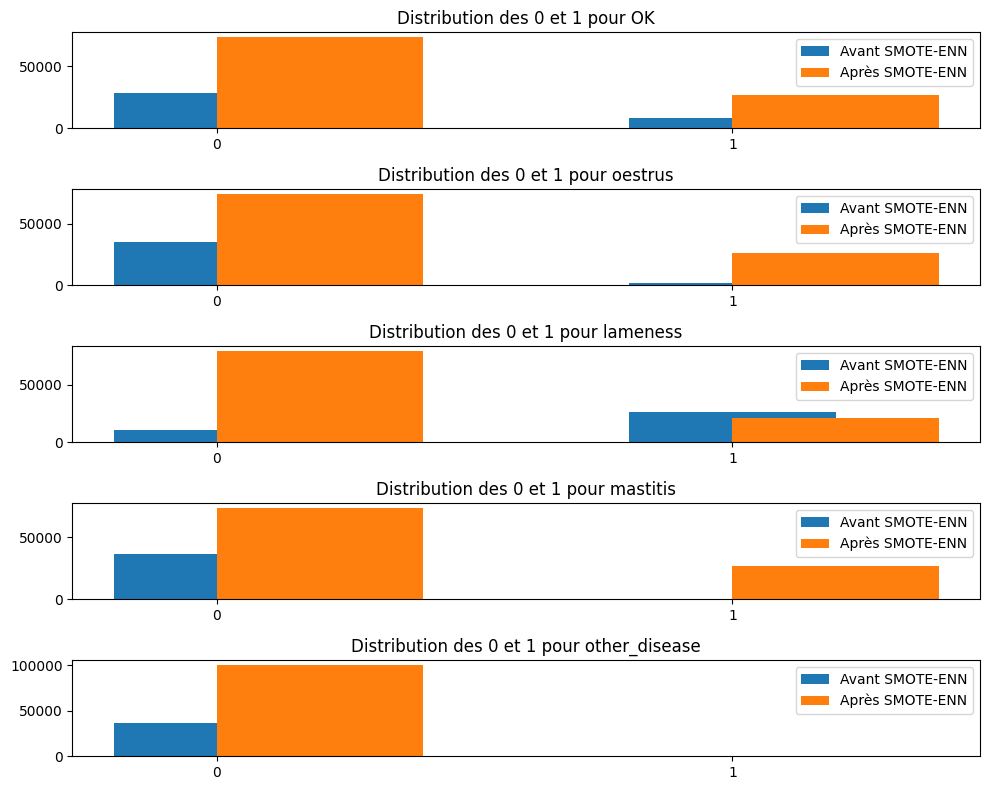

In [ ]:
import matplotlib.pyplot as plt

# Définir les colonnes cibles
target_columns = ['OK','oestrus', 'lameness', 'mastitis', 'other_disease']

# Calcul des distributions des 0 et 1 avant SMOTE-ENN
before_counts = {col: df_cleaned[col].value_counts().to_dict() for col in target_columns}

# Calcul des distributions des 0 et 1 après SMOTE-ENN
after_counts = {col: final_df[col].value_counts().to_dict() for col in target_columns}

# Affichage des distributions sous forme d'histogrammes
fig, axes = plt.subplots(len(target_columns), 1, figsize=(10, 8))

for i, col in enumerate(target_columns):
    # Récupérer les comptes avant et après
    before_vals = before_counts[col]
    after_vals = after_counts[col]

    # Tracer les histogrammes
    axes[i].bar([0, 1], [before_vals.get(0, 0), before_vals.get(1, 0)], width=0.4, label="Avant SMOTE-ENN", align='center')
    axes[i].bar([0, 1], [after_vals.get(0, 0), after_vals.get(1, 0)], width=0.4, label="Après SMOTE-ENN", align='edge')

    # Définir les propriétés du graphique
    axes[i].set_title(f'Distribution des 0 et 1 pour {col}')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Afficher la forme du dataset avant SMOTE-ENN
print("✅ AVANT SMOTE-ENN :")
print("Nombre de lignes :", df_cleaned.shape[0])
print("Nombre de colonnes :", df_cleaned.shape[1])

# Afficher la forme du dataset après SMOTE-ENN
print("\n✅ APRÈS SMOTE-ENN :")
print("Nombre de lignes :", final_df.shape[0])
print("Nombre de colonnes :", final_df.shape[1])


✅ AVANT SMOTE-ENN :
Nombre de lignes : 36911
Nombre de colonnes : 41

✅ APRÈS SMOTE-ENN :
Nombre de lignes : 100478
Nombre de colonnes : 40
